In [31]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython


## Load Dataset

In [32]:
import numpy as np
import pandas as pd
from tqdm import tqdm
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [34]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
# 用均值填充缺失值
df=df.fillna(df.mean())
df.to_csv("full.csv")

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

C:\Users\86135\AppData\Local\Temp\ipykernel_1032\1243668341.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


## Encode 

In [36]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################

df_encoded=pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
df_encoded.head()

# 检查是否有字符串类型的数据
string_columns = df_encoded.select_dtypes(include=['object'])

for col in string_columns:
    df_encoded[col]=pd.to_numeric(df_encoded[col], errors='coerce')

df_encoded.to_csv("df_encoded.csv")
df_encoded.head()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1


## Data process

In [37]:

################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################

for i in tqdm(df_encoded.columns):
    max=df_encoded[i].max()
    min=df_encoded[i].min()
    for j in df_encoded.index:
        df_encoded.loc[j,i]=(df_encoded.loc[j,i]-min)/(max-min)
df_normalized=df_encoded.drop(df_encoded.columns[-1],axis=1)

# 欠采样
#cnt=0
#for i in tqdm(df_normalized.index):
#    if df_normalized.iloc[i,-1]==1:
#        cnt=cnt+1
#p_samples=df_normalized[df_normalized['Loan_Status_N']==1]
#n_samples=df_normalized[df_normalized['Loan_Status_N']==0]
#n_samples=n_samples.sample(n=cnt,random_state=1)

#samples=pd.concat([p_samples,n_samples])

#samples.to_csv("samples.csv")

100%|██████████| 22/22 [00:01<00:00, 11.24it/s]


In [38]:
# 划分特征和标签
X = df_normalized.iloc[:, :-1]  # 所有列除了最后一列
y = df_normalized.iloc[:, -1]   # 最后一列作为标签
#X = samples.iloc[:,:-1]
#y = samples.iloc[:,-1]
samples_num=df_normalized.shape[0]
#samples_num=cnt*2
# 按 4:1 比例划分训练集和测试集
train_size = int(0.8 * samples_num)  # 训练集大小为总数据集大小的 80%
# 打乱数据集顺序
np.random.seed(3)  # 设置随机种子以确保可复现性
indices = np.random.permutation(samples_num)
X_shuffled = X.iloc[indices]
y_shuffled = y.iloc[indices]
X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]

X_train.to_csv("X_train.csv")
y_train.to_csv("y_test.csv")
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Train

100%|██████████| 1999/1999 [00:18<00:00, 110.76it/s]


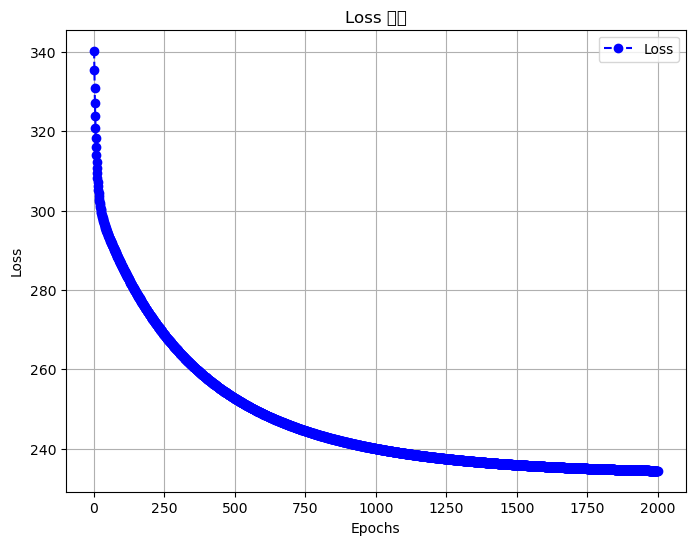

In [70]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################

model=LogisticRegression('l2',0.001,True)

Losses=model.fit(X_train.values,y_train.values,0.0001,1e-7,2000)
# 创建 x 轴的数据
epochs = list(range(1, len(Losses) + 1))


# 绘制 Loss 曲线
plt.figure(figsize=(8, 6))
plt.plot(epochs, Losses, marker='o', linestyle='--', color='b', label='Loss')
plt.title('Loss 曲线')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

## Test

In [72]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################
prob_train=model.predict(X_train.values)
num=0
for i in range(len(prob_train)):
    if prob_train[i]==y_train.iloc[i]:
        num=num+1
acc_train=num/len(prob_train)
print("In train:")
print(acc_train)
prob=model.predict(X_test.values)
num=0
for i in range(len(prob)):
    if prob[i]==y_test.iloc[i]:
        num=num+1
acc=num/len(prob)
print("In test:")
print(acc)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In train:
0.8065173116089613
In test:
0.8130081300813008


# 参数比较
上面的结果是我做出的比较好的结果,下面将展示不同参数的学习效果

## 1.正则化
根据上面的结果我们可以发现,模型在训练集和测试集上的表现差不多,没有很严重的过拟合,下面我们将通过参数范数惩罚来说明这一点,根据我调参过程中的经验,加上正则化项后,模型一般能在1000步内达到最优的Loss

In [49]:
# 使用l1范数
model_r1=[]
Losses_r1=[]
prob_train_r1=[]
prob_r1=[]
acc_train_r1=[]
acc_r1=[]
for i in range(5):
    model_r1.append(LogisticRegression('l1',0.01*i,True))
    Losses_r1.append(model_r1[i].fit(X_train.values,y_train.values,0.0001,1e-7,1000))
    prob_train_r1.append(model_r1[i].predict(X_train.values))
    num=0
    for j in range(len(prob_train_r1[i])):
        if prob_train_r1[i][j]==y_train.iloc[j]:
            num=num+1
    acc_train_r1.append(num/len(prob_train_r1[i]))
    prob_r1.append(model_r1[i].predict(X_test.values))
    num=0
    for j in range(len(prob_r1[i])):
        if prob_r1[i][j]==y_test.iloc[i]:
            num=num+1
    acc_r1.append(num/len(prob_r1[i]))

# 比较acc
print("In train:")
print(acc_train_r1)
print("In test:")
print(acc_r1)

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:07<00:00, 137.75it/s]

In train:
[0.8085539714867617, 0.8085539714867617, 0.8085539714867617, 0.8085539714867617, 0.8085539714867617]
In test:
[0.8861788617886179, 0.8861788617886179, 0.8861788617886179, 0.8861788617886179, 0.11382113821138211]


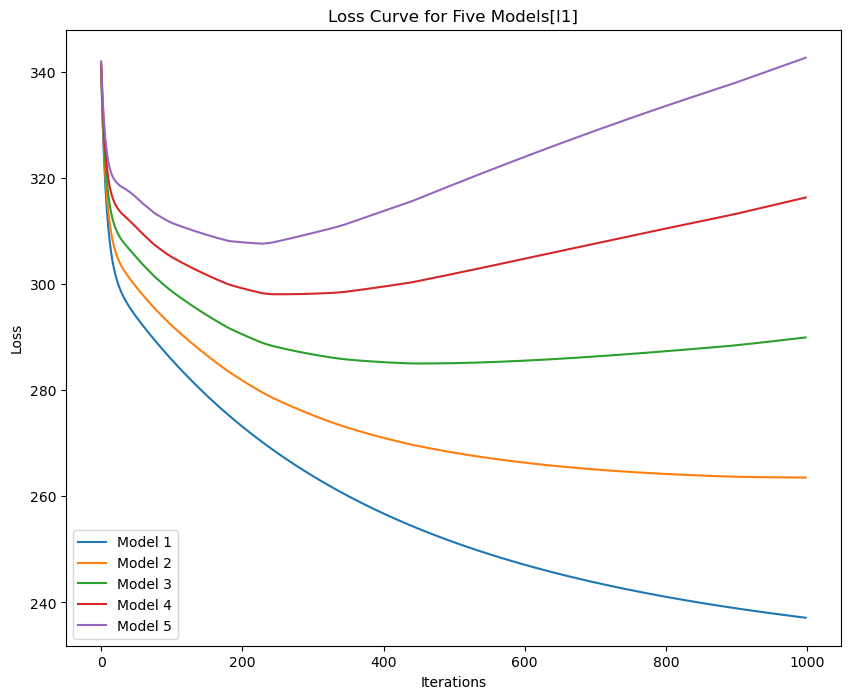

In [50]:
# 画出每个模型的Loss曲线
for i in range(5):
    plt.plot(Losses_r1[i], label=f"Model {i+1}")

# 添加标题和标签
plt.title('Loss Curve for Five Models[l1]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
# 使用l2范数
model_r2=[]
Losses_r2=[]
prob_train_r2=[]
prob_r2=[]
acc_train_r2=[]
acc_r2=[]
for i in range(5):
    model_r2.append(LogisticRegression('l2',0.01*i,True))
    Losses_r2.append(model_r2[i].fit(X_train.values,y_train.values,0.0001,1e-7,1000))
    prob_train_r2.append(model_r2[i].predict(X_train.values))
    num=0
    for j in range(len(prob_train_r2[i])):
        if prob_train_r2[i][j]==y_train.iloc[j]:
            num=num+1
    acc_train_r2.append(num/len(prob_train_r2[i]))
    prob_r2.append(model_r2[i].predict(X_test.values))
    num=0
    for j in range(len(prob_r2[i])):
        if prob_r2[i][j]==y_test.iloc[i]:
            num=num+1
    acc_r2.append(num/len(prob_r2[i]))

# 比较acc
print("In train:")
print(acc_train_r2)
print("In test:")
print(acc_r2)

100%|██████████| 999/999 [00:08<00:00, 113.36it/s]

In train:
[0.8085539714867617, 0.8085539714867617, 0.8085539714867617, 0.8085539714867617, 0.8085539714867617]
In test:
[0.8861788617886179, 0.8861788617886179, 0.8861788617886179, 0.8861788617886179, 0.11382113821138211]


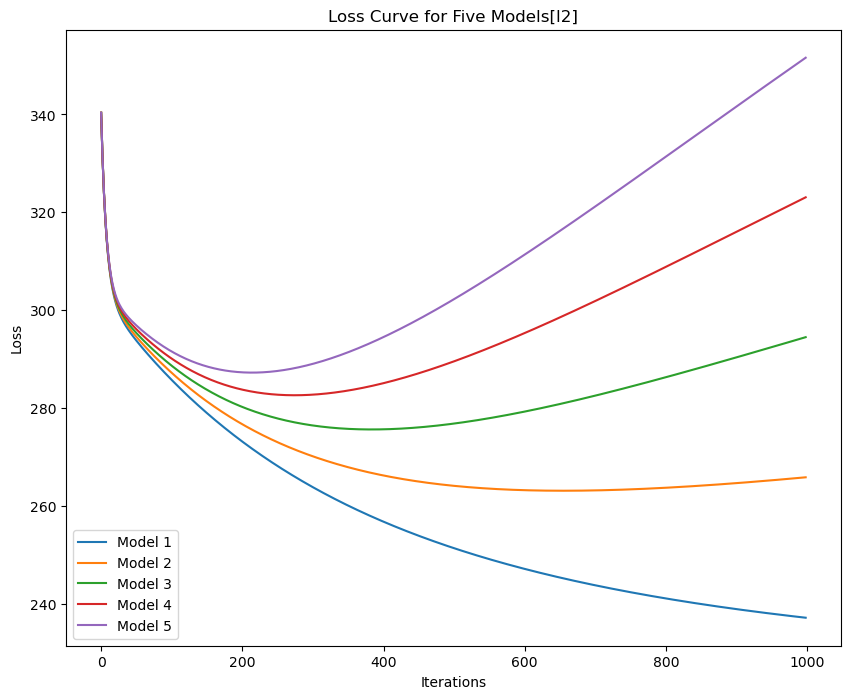

In [52]:
# 画出每个模型的Loss曲线
for i in range(5):
    plt.plot(Losses_r2[i], label=f"Model {i+1}")

# 添加标题和标签
plt.title('Loss Curve for Five Models[l2]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 2.bias
根据我的调试,bias对结果影响不是很大,这里略过

## 学习率与步数
由于Loss是凸的,我们的学习率可以调得比较小,相应的步长也会增加,下面我会展示一部分结果,为了充分展示差异,我设定步长统一为1w步

In [57]:
# 学习率
model_lr=[]
Losses_lr=[]
prob_train_lr=[]
prob_lr=[]
acc_train_lr=[]
acc_lr=[]
for i in range(4):
    if i==0:
        lr=0.1
    elif i==1:
        lr=0.01
    elif i==2:
        lr=0.001
    else:
        lr=0.0001
    model_lr.append(LogisticRegression('l2',0,True))
    Losses_lr.append(model_lr[i].fit(X_train.values,y_train.values,lr,1e-7,10000))
    prob_train_lr.append(model_lr[i].predict(X_train.values))
    num=0
    for j in range(len(prob_train_lr[i])):
        if prob_train_lr[i][j]==y_train.iloc[j]:
            num=num+1
    acc_train_lr.append(num/len(prob_train_lr[i]))
    prob_lr.append(model_lr[i].predict(X_test.values))
    num=0
    for j in range(len(prob_lr[i])):
        if prob_lr[i][j]==y_test.iloc[i]:
            num=num+1
    acc_lr.append(num/len(prob_lr[i]))

# 比较acc
print("In train:")
print(acc_train_lr)
print("In test:")
print(acc_lr)

100%|██████████| 9999/9999 [01:31<00:00, 109.13it/s]

In train:
[0.7861507128309573, 0.5234215885947047, 0.8085539714867617, 0.8085539714867617]
In test:
[0.926829268292683, 0.2601626016260163, 0.8780487804878049, 0.8780487804878049]


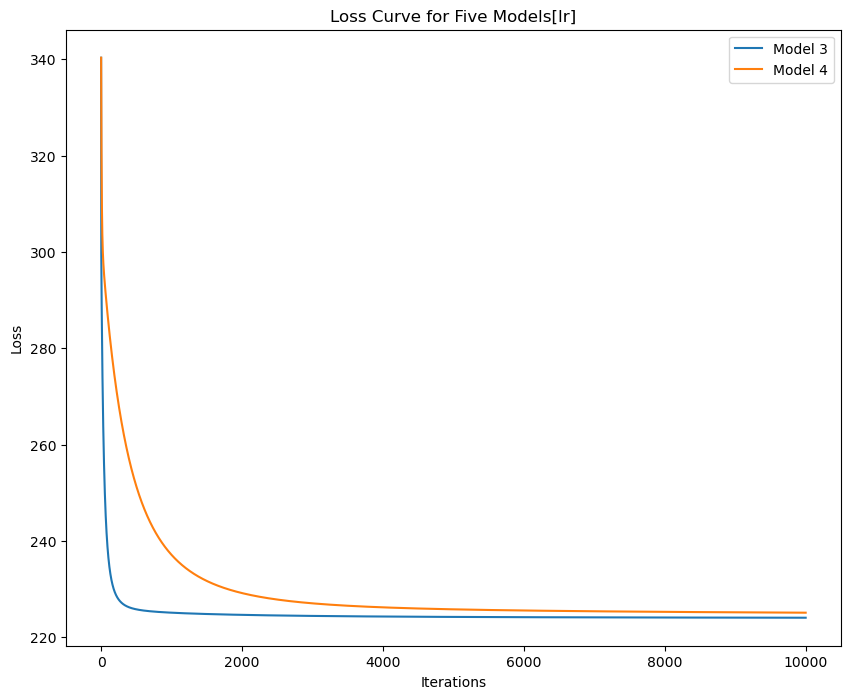

In [59]:
# 画出每个模型的Loss曲线
for i in range(2):
    plt.plot(Losses_lr[i+2], label=f"Model {i+3}")
# 这里不画前两个是因为波动较大,严重干扰画面
# 添加标题和标签
plt.title('Loss Curve for Five Models[lr]')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()